# AtmoTech data introduction

I have taken their spreadsheet, coverted it into a series of CSV files and then converted them in pandas dataframes and then saved them as pickle files so that anyone can quickly and easily get the data in Python.

The Python script:
 - Each CSV file represents a room in the building.
 - Imports the CSV files into a Pandas DataFrame.
 - Converts the time-stamps to DateTime and assigns them to the index of the DatFrame.
 - Removes the NaTs and duplicates from the index.
 - Saves the each room as a Pickle file.

I have pushed all of this (including the CSV and Pickle files) to a GitHub repository and so one can easily clone everything and start working. Repo: https://github.com/OliCUoB/UoB_JGI_data_viz_AtmoTech 

Here is a quick example of how one may do that. There are multiple different rooms which form a building (see Excel spreadsheet for more information). Each room will be treated as a seperate data frame.

In [1]:
# import libraries
import pandas as pd
import matplotlib.pyplot as plt
# create plost inline
%matplotlib inline

In [2]:
# create a dictionary to hold each data frame (one for each room)
file_names = ['brake_test_area.pkl',  'entrance.pkl',  'parked_vehicles.pkl',  'pits.pkl',  'workshop.pkl']
dict_of_dfs = {name[:-4]: pd.io.pickle.read_pickle(name) for name in file_names}
print('dict_of_dfs.keys() = ', dict_of_dfs.keys())
print('dict_of_dfs[\'brake_test_area\'].describe = ', dict_of_dfs['brake_test_area'].describe())
# uncomment below if you want to see a description of all the rooms

#for name in file_names:
#    print(name + ': ')
#    print(dict_of_dfs[name[:-4]].describe())

dict_of_dfs.keys() =  dict_keys(['workshop', 'brake_test_area', 'pits', 'entrance', 'parked_vehicles'])
dict_of_dfs['brake_test_area'].describe =         PM2.5_nom  PM10_nom  humidity_percent    pm10_ugm3     PM10_Avg  \
count     8957.0    8957.0       8957.000000  8957.000000  8957.000000   
mean        40.0      25.0         40.652216    18.189864    18.184531   
std          0.0       0.0          4.902648    34.061608    26.359766   
min         40.0      25.0         30.100000     0.723334     0.902833   
25%         40.0      25.0         36.400000     7.570002     7.720500   
50%         40.0      25.0         41.300000    11.858330    11.939096   
75%         40.0      25.0         44.400000    19.153330    19.434163   
max         40.0      25.0         53.000000  1095.627000   463.322003   

         pm25_ugm3    PM2.5_Avg  temperature_degC  
count  8957.000000  8957.000000       8957.000000  
mean      6.474399     6.470088         15.388199  
std      12.467993     8.66383

In [3]:
# Uncomment below to visualise the data in each room
#for name in dict_of_dfs.keys():
#    dict_of_dfs[name].plot(title = name)

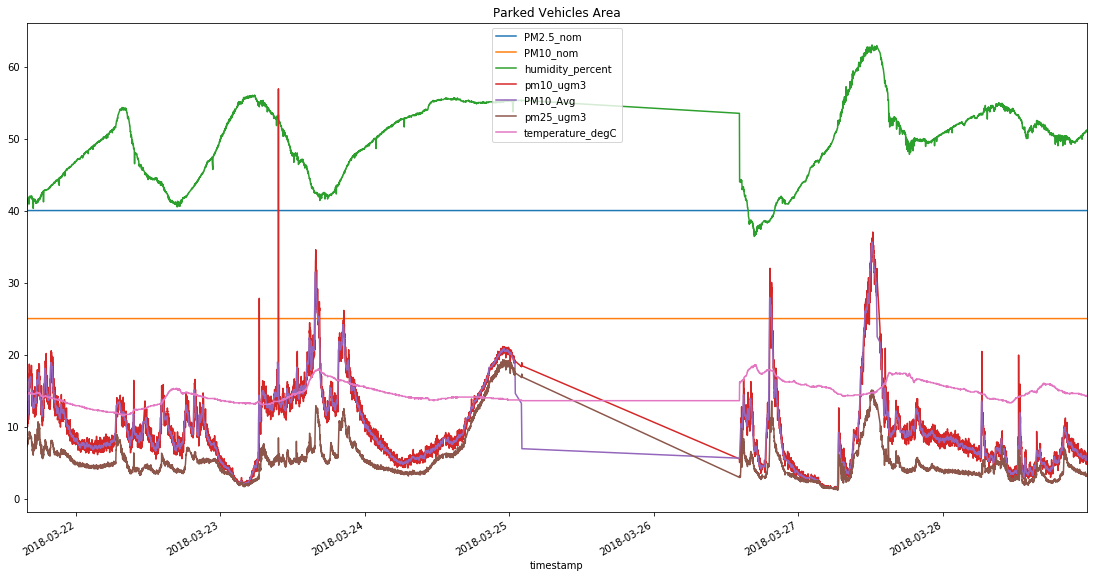

In [4]:
# Parked vehicles looks the craziest so lets take a closer look
plt.rcParams['figure.figsize'] = [19, 10]
dict_of_dfs['parked_vehicles'].plot(title = 'Parked Vehicles Area')

Here we can see that PM10 and PM2.5 are very correlated (and their corresponding moving averages). Notice also that temperature is correlated but it is unclear of the effect of humidity (if any).

In [5]:
# let's look at the PM2.5 levels for each room
# there's lots of different time stamps so we resample by 5 minute intervals taking the mean of the points in the interval
#fig = plt.figure()
#ax = plt.subplot(111)
#for name in dict_of_dfs.keys():
#    print('dict_of_dfs[name].shape = ', dict_of_dfs[name].shape)
#    dict_of_dfs[name]['pm25_ugm3'].plot(ax=ax)
dict_of_dfs_resamp = {name[:-4] + '_pm25_ugm3': dict_of_dfs[name[:-4]]['pm25_ugm3'].resample('30T').mean() for name in file_names}

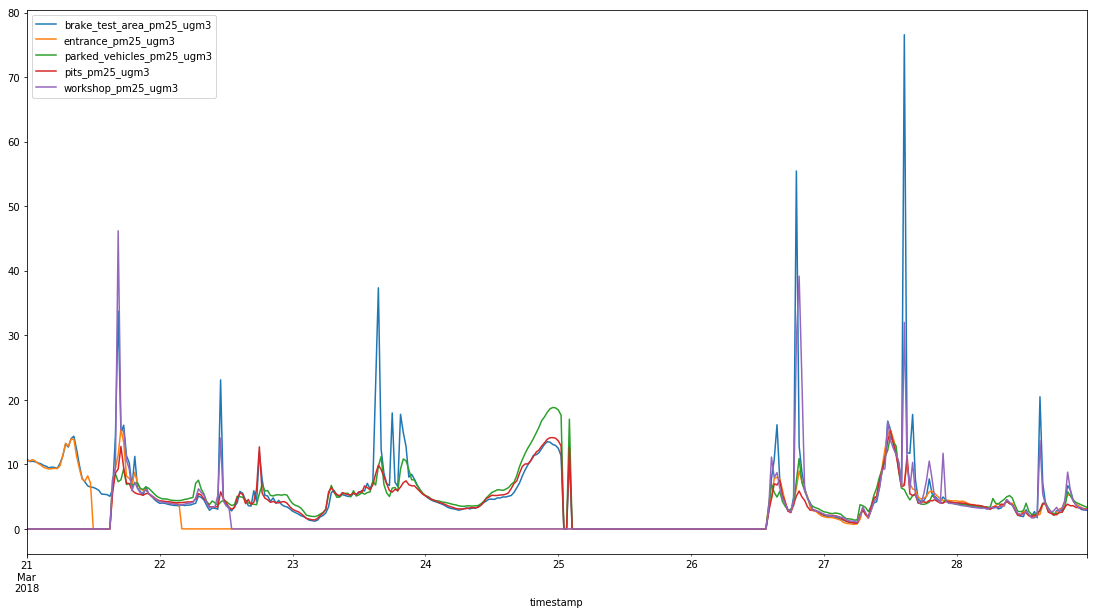

In [6]:
# put all data into one data frame
df_dict = {name[:-4] + '_pm25_ugm3': dict_of_dfs[name[:-4]]['pm25_ugm3'] for name in file_names} # collect all the desired columns into a list
pm25 = pd.DataFrame(dict_of_dfs_resamp)
pm25_filled = pm25.fillna(value=0)
pm25_filled.shape
pm25_filled.plot()
#pm25_filled

We cannot see what's going on here because the scales are so varied and so here we standardise the data using scikit learn.

In [7]:
# Fill nans with last known number
#pm25.fillna(method='pad')

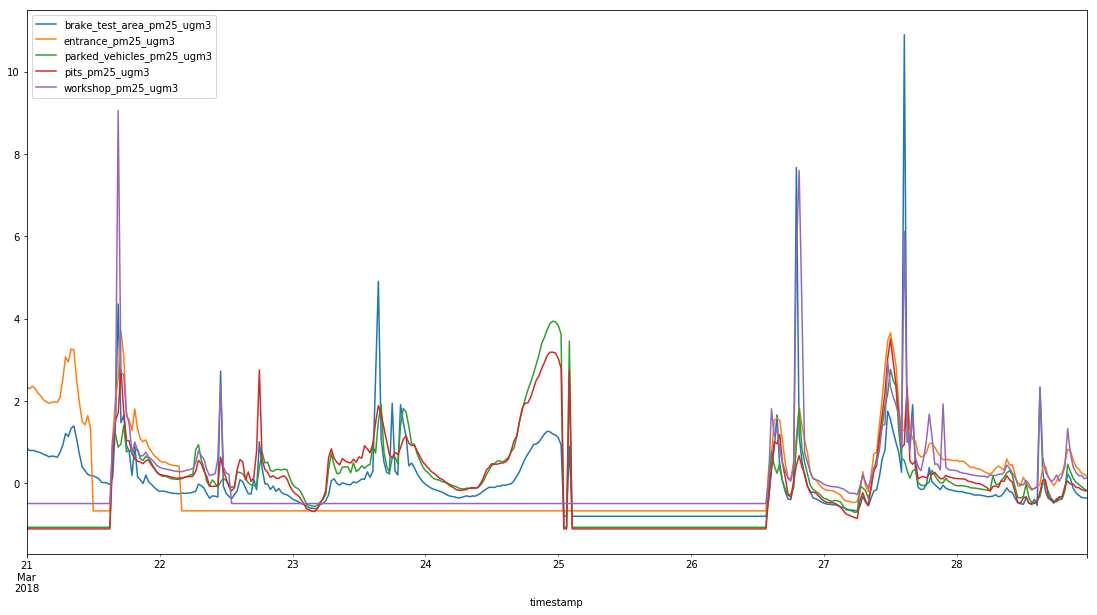

In [8]:
# import libraries
from sklearn.preprocessing import StandardScaler
# Standardise the data and plot
pm25_stand = StandardScaler().fit_transform(pm25_filled)
# this returns a numpy array and so convert back to pandas
pm25_stand = pd.DataFrame(pm25_stand, columns = pm25_filled.columns, index = pm25_filled.index)
pm25_stand.plot()

We can see that there's some periods of missing data but it's not too bad. All the rooms are strongly correlated (unsurprisingly). However, brake_test_area and workshop peak much higher than elsewhere.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f8e38f6f5c0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7f8e38dd50f0>]], dtype=object)

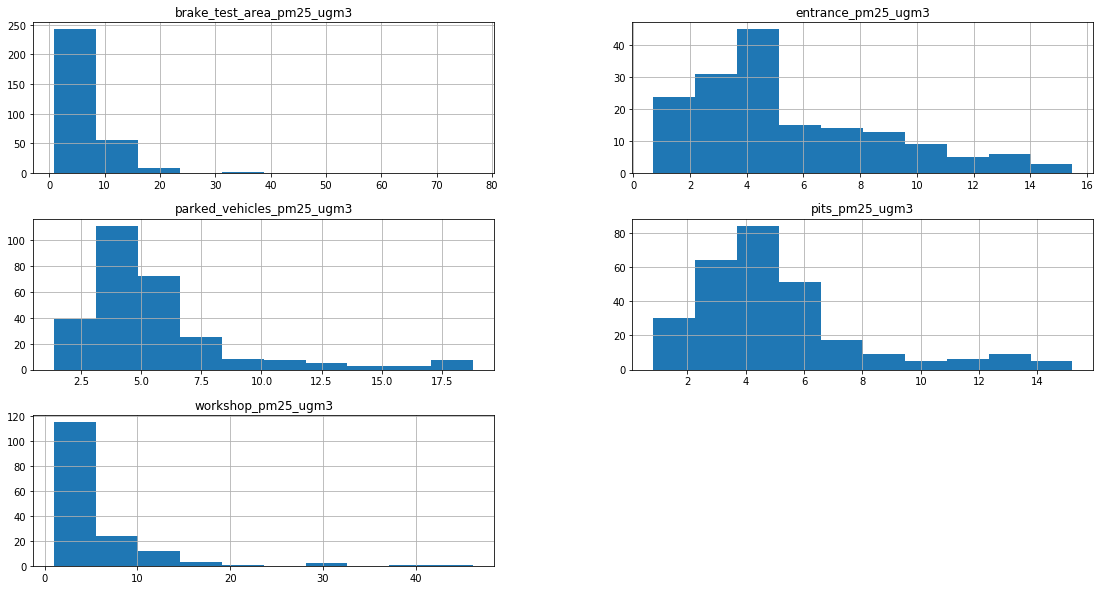

In [9]:
pm25.hist()